In [28]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
 
# Independent variable (Position Level)
X = dataset.iloc[:, 1:-1].values
 
# Dependent variable (Salary)
y = dataset.iloc[:, -1].values
 
# Display dataset preview
print("Dataset Preview:")
print(dataset.head())

Dataset Preview:
            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [29]:
# Training the Linear Regression model on the whole dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
 
# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
 
print("✅ Models Trained Successfully!")

✅ Models Trained Successfully!


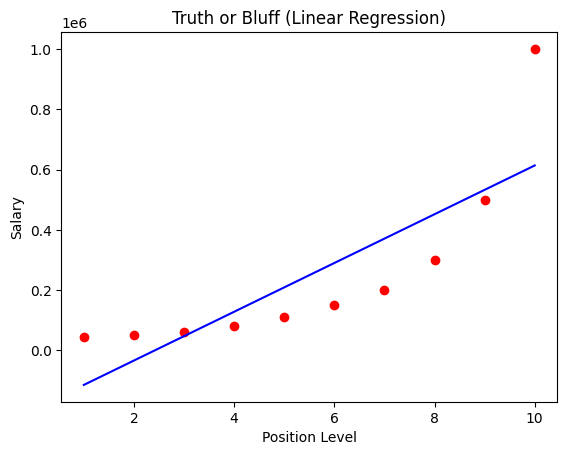

In [30]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

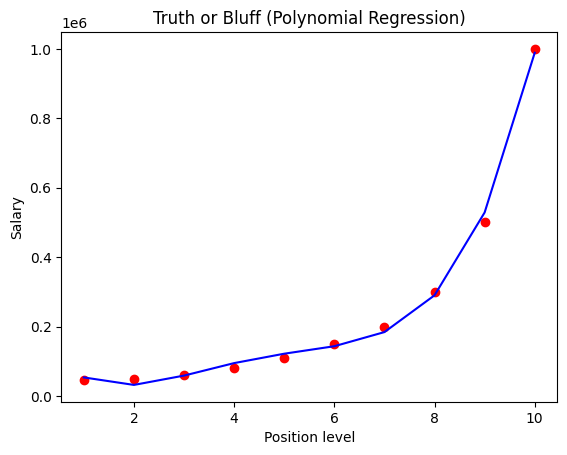

In [31]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_11912\3029784565.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


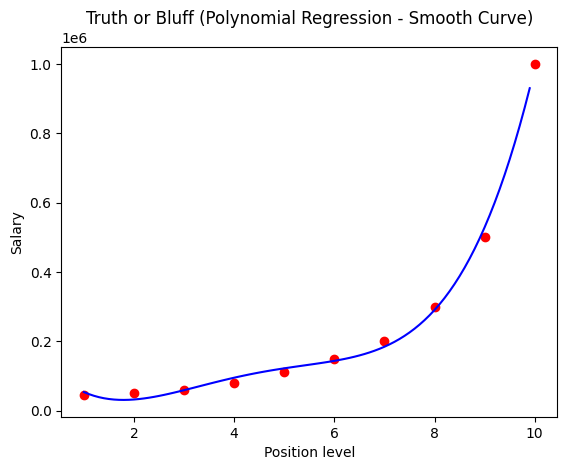

In [32]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression - Smooth Curve)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [33]:

 
# Predicting a new result with Linear Regression
linear_prediction = lin_reg.predict([[6.5]])
print("Linear Regression Prediction for Level 6.5:", linear_prediction)
 
 
# Predicting a new result with Polynomial Regression
poly_prediction = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print("Polynomial Regression Prediction for Level 6.5:", poly_prediction)
 
 

Linear Regression Prediction for Level 6.5: [330378.78787879]
Polynomial Regression Prediction for Level 6.5: [158862.45265155]


🧠 Business Scenario
An automobile company wants to understand how engine size affects the price of a car.
From past observations, the product team believes:
For small engines, price increases slowly
For medium engines, price increases rapidly
For very large engines, price growth slows down due to luxury saturation
This indicates that the relationship between engine size and price is not strictly linear.
You are hired as a Data Analyst to analyze this pattern and build a model that can predict car prices accurately.

📝 Tasks
Load the dataset and identify the relevant columns.
Use:
Engine size as the input feature
Car price as the output variable
Visualize the relationship between engine size and price.
Build a predictive model to estimate car price based on engine size.
Predict the price for a car with:
Engine size = 200
 Increase the flexibility of your model and observe how the curve changes.
Compare predictions from:
a simple straight-line model
a curved model
Analyze which model:
captures the trend better
gives more realistic predictions
Evaluate prediction errors and interpret them in business terms.
Answer the following:
Why does a straight-line model fail here?
What risk occurs if the curve becomes too flexible?
Which model would you recommend for production and why?

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
#load the data set
df=pd.read_csv('CarPrice_Assignment.csv')

In [36]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [37]:
X = df[["enginesize"]]
y = df["price"]

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 1. Create / Load Dataset (sample automobile data)
np.random.seed(42)

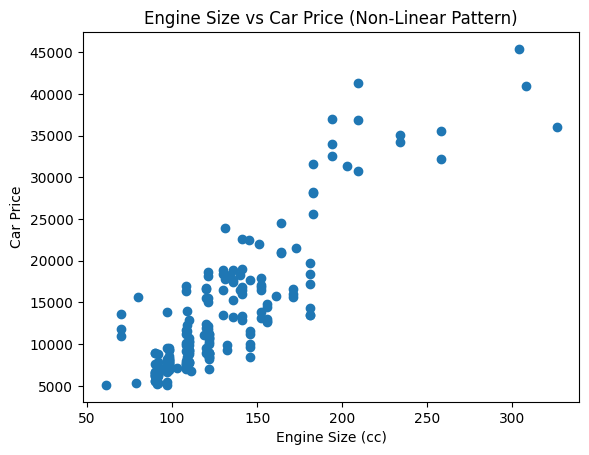

In [39]:
plt.figure()
plt.scatter(X, y)
plt.xlabel("Engine Size (cc)")
plt.ylabel("Car Price")
plt.title("Engine Size vs Car Price (Non-Linear Pattern)")
plt.show()

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [41]:
from sklearn.model_selection import train_test_split
# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Polynomial Feature Transformation
poly = PolynomialFeatures(degree=3, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 5. Train the Model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 6. Test the Model
y_pred = model.predict(X_test_poly)

In [42]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
engine_200 = np.array([[200]])
engine_200_poly = poly.transform(engine_200)
predicted_price_200 = model.predict(engine_200_poly)

predicted_price_200

d:\7246\1-9-25  mrg\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([28207.45163684])

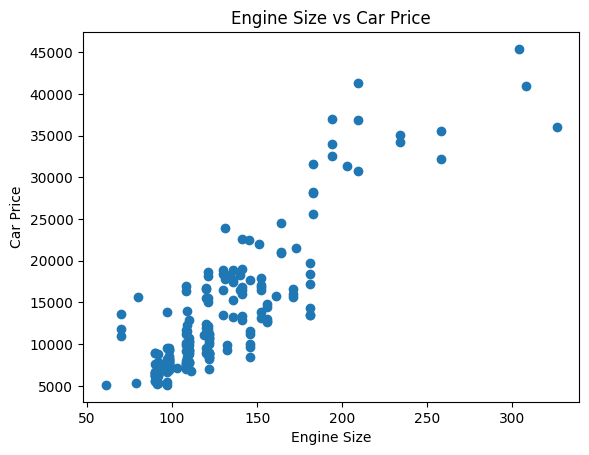

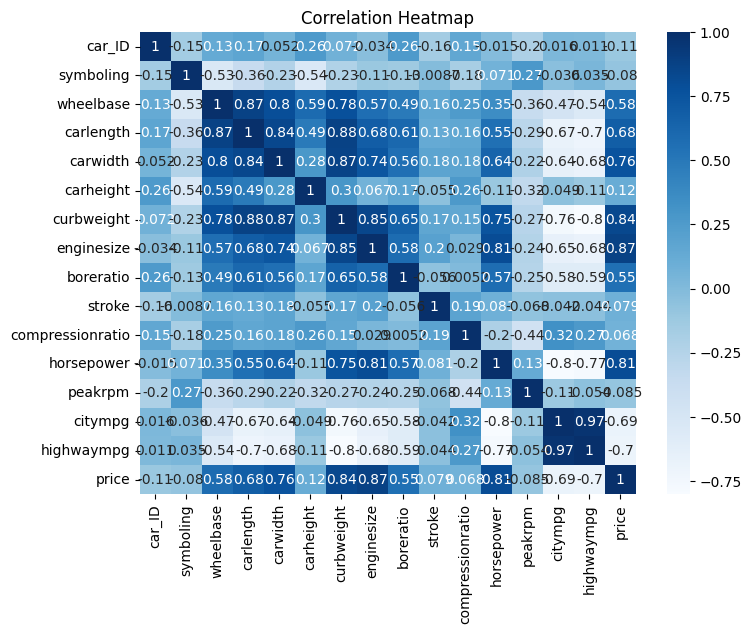

d:\7246\1-9-25  mrg\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\7246\1-9-25  mrg\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
d:\7246\1-9-25  mrg\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\7246\1-9-25  mrg\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


LINEAR REGRESSION
RMSE: 3932.614774664367
R2: 0.8040958796678975
Predicted Price (Engine Size = 200): 25427.147445039864

POLYNOMIAL REGRESSION
RMSE: 3409.015907135493
R2: 0.8527894915205994
Predicted Price (Engine Size = 200): 27760.608345454166


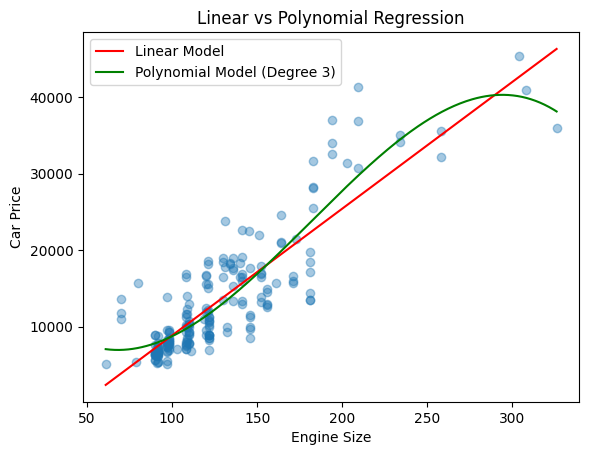

In [44]:
# Engine Size vs Car Price
# Linear vs Polynomial Regression + Correlation Heatmap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # For heatmap

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# --------------------------------------------------
# 1. Load Dataset
# --------------------------------------------------
df = pd.read_csv("CarPrice_Assignment.csv")

# Relevant columns
X = df[['enginesize']]   # Input feature
y = df['price']          # Output variable

# --------------------------------------------------
# 2. Visualize Relationship
# --------------------------------------------------
plt.scatter(X, y)
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Engine Size vs Car Price")
plt.show()

# --------------------------------------------------
# 2a. Heatmap of correlations
# --------------------------------------------------
# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

# --------------------------------------------------
# 3. Train-Test Split
# --------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------------------------------------------------
# 4. Model 1: Simple Linear Regression
# --------------------------------------------------
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred_lin = lin_model.predict(X_test)

lin_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin))
lin_r2 = r2_score(y_test, y_pred_lin)

lin_price_200 = lin_model.predict([[200]])[0]

# --------------------------------------------------
# 5. Model 2: Polynomial Regression (Degree 3)
# --------------------------------------------------
poly = PolynomialFeatures(degree=3, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)

poly_rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly))
poly_r2 = r2_score(y_test, y_pred_poly)

poly_price_200 = poly_model.predict(poly.transform([[200]]))[0]

# --------------------------------------------------
# 6. Results
# --------------------------------------------------
print("LINEAR REGRESSION")
print("RMSE:", lin_rmse)
print("R2:", lin_r2)
print("Predicted Price (Engine Size = 200):", lin_price_200)

print("\nPOLYNOMIAL REGRESSION")
print("RMSE:", poly_rmse)
print("R2:", poly_r2)
print("Predicted Price (Engine Size = 200):", poly_price_200)

# --------------------------------------------------
# 7. Visualization: Linear vs Polynomial Model
# --------------------------------------------------
engine_range = np.linspace(X.min(), X.max(), 300).reshape(-1,1)

price_lin_curve = lin_model.predict(engine_range)
price_poly_curve = poly_model.predict(poly.transform(engine_range))

plt.scatter(X, y, alpha=0.4)
plt.plot(engine_range, price_lin_curve, label="Linear Model", color='red')
plt.plot(engine_range, price_poly_curve, label="Polynomial Model (Degree 3)", color='green')
plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.show()


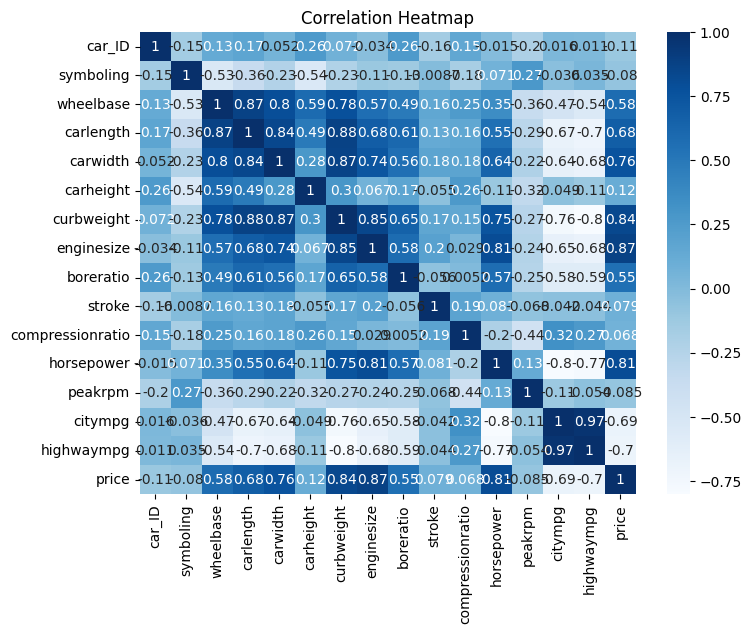

In [45]:
# --------------------------------------------------
# 2a. Heatmap of correlations
# --------------------------------------------------
# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

Relationship of Numerical Features with Price

enginesize → Strong positive 0.87

horsepower → Strong positive 0.81

curbweight → Strong positive 0.84

carwidth → Moderate positive 0.76

carlength → Moderate positive 0.68

wheelbase → Moderate positive 0.58

boreratio → Moderate positive 0.55

citympg → Moderate positive 0.69

highwaympg → Moderate positive 0.70

carheight → Weak positive 0.12

symboling → Weak positive 0.08

peakrpm → Weak positive 0.08

stroke → Weak positive 0.08

compressionratio → Weak positive 0.07



# Insight:
* Price is mainly influenced by engine and performance metrics,
* moderately by size, 
* with minor effects from other features.

# Weak values --which are less than 0.1
* peakprm
* stroke
* compression ratio
* symboling


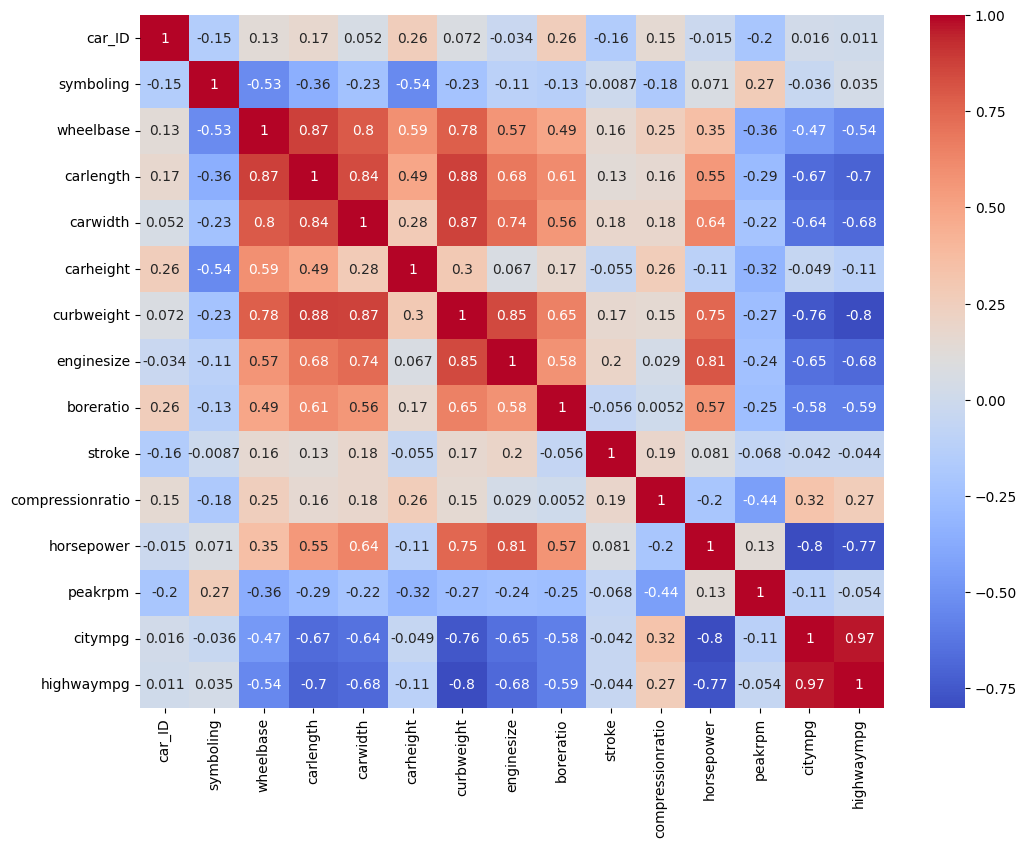

In [46]:
x=df.drop('price',axis=1)
 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.show()

## Correlation Analysis Summary

### 🔹 Unique Numerical Columns Used
- car_ID  
- symboling  
- wheelbase  
- carlength  
- carwidth  
- carheight  
- curbweight  
- enginesize  
- boreratio  
- stroke  
- compressionratio  
- horsepower  
- peakrpm  
- citympg  
- highwaympg  

---

### 🔸 Strong Positive Correlation Pairs (|corr| ≥ 0.75)

- **wheelbase ↔ carlength** (0.87)  
- **carlength ↔ curbweight** (0.88)  
- **carwidth ↔ curbweight** (0.87)  
- **curbweight ↔ enginesize** (0.85)  
- **curbweight ↔ horsepower** (0.75)  
- **enginesize ↔ horsepower** (0.81)  
- **citympg ↔ highwaympg** (0.97)  



---

### 🔻 Strong Negative Correlation Pairs 

- **horsepower ↔ citympg** (-0.80)  
- **horsepower ↔ highwaympg** (-0.77)  
- **curbweight ↔ citympg** (-0.76)  
- **curbweight ↔ highwaympg** (-0.80)  


---


In [47]:
# Columns to remove
drop_feature_feature = [
    'carlength',
    'carwidth',
    'wheelbase',
    'highwaympg'
]

drop_feature_target = [
    'car_ID',
    'symboling',
    'stroke',
    'peakrpm'
]

# Combine all columns to drop
columns_to_drop = drop_feature_feature + drop_feature_target

# Drop columns safely
X_reduced = X.drop(columns=columns_to_drop, errors='ignore')

print("Remaining Features:")
print(list(X_reduced.columns))
print(f"\nTotal Remaining Features: {X_reduced.shape[1]}")


Remaining Features:
['enginesize']

Total Remaining Features: 1


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)


In [49]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


RMSE: 3932.61
R² Score: 0.8041


In [51]:
from sklearn.linear_model import Ridge ,Lasso

In [54]:
from sklearn.linear_model import RidgeCV

🔵 RIDGE REGRESSION
Best alpha: 0.30000000000000004
Train R² : 0.9001
Test  R² : 0.9058
Train RMSE: 1.6359
Test  RMSE: 1.7058
----------------------------------------
🔴 LASSO REGRESSION
Best alpha: 0.001
Train R² : 0.9001
Test  R² : 0.9059
Train RMSE: 1.6359
Test  RMSE: 1.7052
----------------------------------------
📌 Lasso Selected Features:
     Feature  Coefficient
0         TV     4.586252
1      Radio     1.489189
2  Newspaper     0.087187


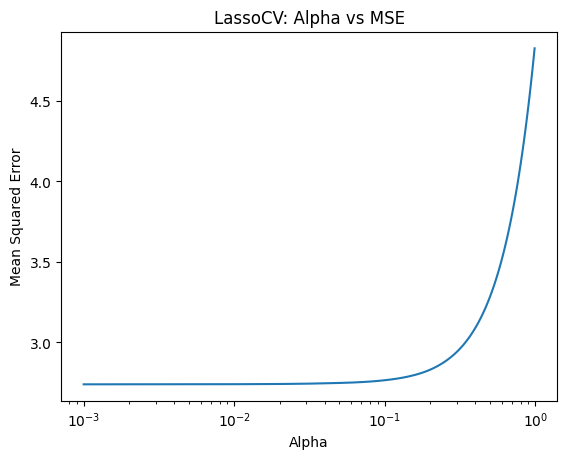

In [56]:
# ===============================
# COMPLETE RIDGE & LASSO PIPELINE
# Advertising.csv
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# -------------------------------
# Load Dataset
# -------------------------------
df = pd.read_csv("Advertising.csv")

# Remove index column if exists
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Features & Target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# -------------------------------
# Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# RidgeCV Model
# -------------------------------
ridge_alphas = np.arange(0.1, 10, 0.05)

ridge_model = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', RidgeCV(alphas=ridge_alphas))
])

ridge_model.fit(X_train, y_train)

# Ridge Predictions
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

# Ridge Metrics
print("🔵 RIDGE REGRESSION")
print(f"Best alpha: {ridge_model.named_steps['ridge'].alpha_}")
print(f"Train R² : {r2_score(y_train, y_train_pred_ridge):.4f}")
print(f"Test  R² : {r2_score(y_test, y_test_pred_ridge):.4f}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_ridge)):.4f}")
print(f"Test  RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_ridge)):.4f}")
print("-" * 40)

# -------------------------------
# LassoCV Model
# -------------------------------
lasso_model = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', LassoCV(
        alphas=np.arange(0.001, 1, 0.01),
        cv=5,
        max_iter=10000
    ))
])

lasso_model.fit(X_train, y_train)

# Lasso Predictions
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

# Lasso Metrics
print("🔴 LASSO REGRESSION")
print(f"Best alpha: {lasso_model.named_steps['lasso'].alpha_}")
print(f"Train R² : {r2_score(y_train, y_train_pred_lasso):.4f}")
print(f"Test  R² : {r2_score(y_test, y_test_pred_lasso):.4f}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_lasso)):.4f}")
print(f"Test  RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_lasso)):.4f}")
print("-" * 40)

# -------------------------------
# Lasso Feature Selection
# -------------------------------
lasso_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_model.named_steps['lasso'].coef_
})

print("📌 Lasso Selected Features:")
print(lasso_coefficients)

# -------------------------------
# Alpha vs Error Plot (Lasso)
# -------------------------------
mse_path = lasso_model.named_steps['lasso'].mse_path_.mean(axis=1)
alphas = lasso_model.named_steps['lasso'].alphas_

plt.figure()
plt.plot(alphas, mse_path)
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Mean Squared Error")
plt.title("LassoCV: Alpha vs MSE")
plt.show()


In [58]:
from sklearn.linear_model import RidgeCV
import numpy as np
model=RidgeCV(alphas=alphas)
alphas=np.arange(0.1,10,0.05)
model.fit(X_train, y_train)
print("Best alpha:", model.alpha_)
print("best score: ",model.score(X_test,y_test))

Best alpha: 9.950000000000003
best score:  0.9058885606773609


In [60]:
from sklearn.linear_model import LassoCV
import numpy as np
model=LassoCV(alphas=alphas)
alphas=np.arange(0.1,10,0.05)
model.fit(X_train, y_train)
print("Best alpha:", model.alpha_)
print("best score: ",model.score(X_test,y_test))

Best alpha: 0.1
best score:  0.9058505279101615
